<a href="https://colab.research.google.com/github/gauravcr7rm/cool_name_pending/blob/master/paytm_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
data = pd.read_csv("data.csv")
data.shape

In [16]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,lowercase_descriptions
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,white hanging heart t-light holder
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,white metal lantern
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,cream cupid hearts coat hanger
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,knitted union flag hot water bottle
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,red woolly hottie white heart.


In [17]:
data.isnull().sum() / data.shape[0] * 100

InvoiceNo                  0.000000
StockCode                  0.000000
Description                0.313597
Quantity                   0.000000
InvoiceDate                0.000000
UnitPrice                  0.002680
CustomerID                34.522501
Country                    0.002680
lowercase_descriptions     0.313597
dtype: float64

In [18]:
data[data.Description.isnull()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,lowercase_descriptions
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom,NaN
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom,NaN
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom,NaN
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom,NaN
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom,NaN


In [19]:
data[data.Description.isnull()].CustomerID.isnull().value_counts()
data[data.Description.isnull()].UnitPrice.value_counts()
data[data.CustomerID.isnull()].head()
data.loc[data.CustomerID.isnull(), ["UnitPrice", "Quantity"]].describe()
data.loc[data.Description.isnull()==False, "lowercase_descriptions"] = data.loc[data.Description.isnull()==False,"Description"].apply(lambda l: l.lower())
data.lowercase_descriptions.isnull().value_counts()
data.lowercase_descriptions.dropna().apply(lambda l: np.where("nan" in l, True, False)).value_counts()
data.lowercase_descriptions.dropna().apply(lambda l: np.where("" == l, True, False)).value_counts()

False    37192
Name: lowercase_descriptions, dtype: int64

In [20]:
data.loc[data.lowercase_descriptions.isnull()==False, "lowercase_descriptions"] = data.loc[data.lowercase_descriptions.isnull()==False, "lowercase_descriptions"].apply(lambda l: np.where("nan" in l, None, l))
data.lowercase_descriptions.isnull().value_counts()

False    37159
True       150
Name: lowercase_descriptions, dtype: int64

In [0]:
data = data.loc[(data.CustomerID.isnull()==False) & (data.lowercase_descriptions.isnull()==False)].copy()

In [22]:
data.isnull().sum().sum()

0

In [27]:
from datetime import timedelta
data["InvoiceDate"] = pd.to_datetime(data.InvoiceDate)

data.InvoiceDate.max() - data.InvoiceDate.min()

Timedelta('16 days 08:57:00')

In [28]:
print("Datafile starts with timepoint {}".format(data.InvoiceDate.min()))
print("Datafile ends with timepoint {}".format(data.InvoiceDate.max))

Datafile starts with timepoint 2010-12-01 08:26:00
Datafile ends with timepoint <bound method Series.max of 0       2010-12-01 08:26:00
1       2010-12-01 08:26:00
2       2010-12-01 08:26:00
3       2010-12-01 08:26:00
4       2010-12-01 08:26:00
5       2010-12-01 08:26:00
6       2010-12-01 08:26:00
7       2010-12-01 08:28:00
8       2010-12-01 08:28:00
9       2010-12-01 08:34:00
10      2010-12-01 08:34:00
11      2010-12-01 08:34:00
12      2010-12-01 08:34:00
13      2010-12-01 08:34:00
14      2010-12-01 08:34:00
15      2010-12-01 08:34:00
16      2010-12-01 08:34:00
17      2010-12-01 08:34:00
18      2010-12-01 08:34:00
19      2010-12-01 08:34:00
20      2010-12-01 08:34:00
21      2010-12-01 08:34:00
22      2010-12-01 08:34:00
23      2010-12-01 08:34:00
24      2010-12-01 08:34:00
25      2010-12-01 08:35:00
26      2010-12-01 08:45:00
27      2010-12-01 08:45:00
28      2010-12-01 08:45:00
29      2010-12-01 08:45:00
                ...        
37278   2010-12-17 17:17

In [29]:
data.InvoiceNo.nunique()

1527

In [30]:
data["IsCancelled"]=np.where(data.InvoiceNo.apply(lambda l: l[0]=="C"), True, False)
data.IsCancelled.value_counts() / data.shape[0] * 100

False    97.710049
True      2.289951
Name: IsCancelled, dtype: float64

In [31]:
data.loc[data.IsCancelled==True].describe()
data = data.loc[data.IsCancelled==False].copy()
data = data.drop("IsCancelled", axis=1)
num_transactions = data.InvoiceNo.nunique()
num_transactions
data.StockCode.nunique()

2348

In [0]:
def count_numeric_chars(l):
    return sum(1 for c in l if c.isdigit())

In [33]:
data["StockCodeLength"] = data.StockCode.apply(lambda l: len(l))
data["nNumericStockCode"] = data.StockCode.apply(lambda l: count_numeric_chars(l))
data.nNumericStockCode.value_counts()

5    23766
0       80
1        6
Name: nNumericStockCode, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


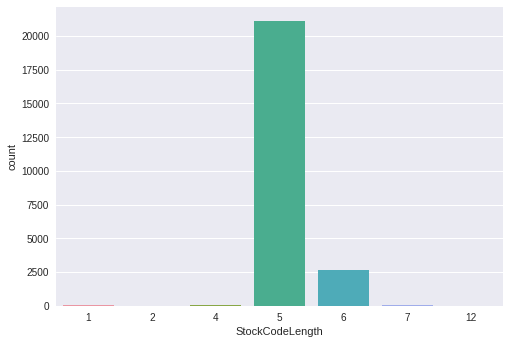

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
sns.countplot(data.StockCodeLength)


In [36]:
data.loc[data.nNumericStockCode < 5].lowercase_descriptions.value_counts()

postage         53
manual          26
carriage         6
bank charges     1
Name: lowercase_descriptions, dtype: int64

In [0]:
data = data.loc[(data.nNumericStockCode == 5) & (data.StockCodeLength==5)].copy()
data.StockCode.nunique()
data = data.drop("nNumericStockCode", axis=1)

In [39]:
data.Description.nunique()

1853

In [0]:
def count_lower_chars(l):
    return sum(1 for c in l if c.islower())
  
data["DescriptionLength"] = data.Description.apply(lambda l: len(l))
data["LowCharsInDescription"] = data.Description.apply(lambda l: count_lower_chars(l))

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


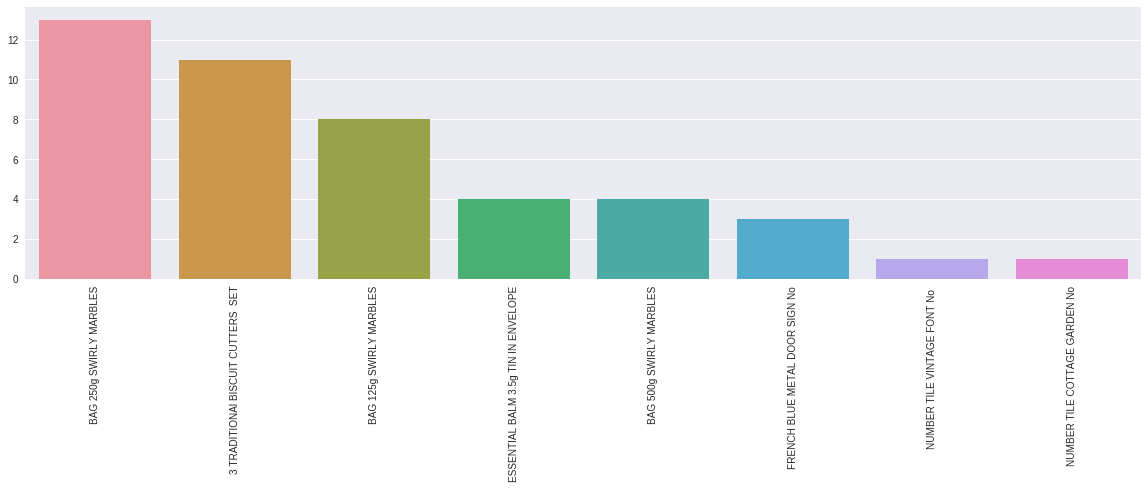

In [42]:
lowchar_counts = data.loc[data.LowCharsInDescription > 0].Description.value_counts()

plt.figure(figsize=(20,5))
sns.barplot(lowchar_counts.index, lowchar_counts.values)
plt.xticks(rotation=90);

In [43]:
def count_upper_chars(l):
    return sum(1 for c in l if c.isupper())
data["UpCharsInDescription"] = data.Description.apply(lambda l: count_upper_chars(l))
data.UpCharsInDescription.describe()

count    21105.000000
mean        22.704146
std          4.387270
min          8.000000
25%         20.000000
50%         23.000000
75%         26.000000
max         32.000000
Name: UpCharsInDescription, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


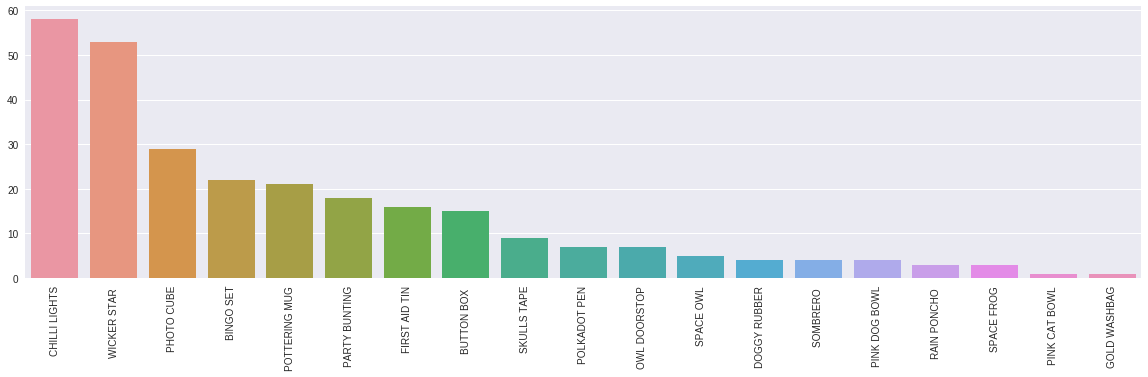

In [44]:
data.loc[data.UpCharsInDescription <=5].Description.value_counts()
data = data.loc[data.UpCharsInDescription > 5].copy()
dlength_counts = data.loc[data.DescriptionLength < 14].Description.value_counts()

plt.figure(figsize=(20,5))
sns.barplot(dlength_counts.index, dlength_counts.values)
plt.xticks(rotation=90);

In [45]:
data.StockCode.nunique()

1844

In [46]:
data.Description.nunique()

1853

In [47]:
data.groupby("StockCode").Description.nunique().sort_values(ascending=False).iloc[0:10]
data.loc[data.StockCode == "23244"].Description.value_counts()
data.StockCode = data.StockCode.astype(np.int)
data.groupby("StockCode").Description.max().head(10)
data.CustomerID.nunique()
data.Country.nunique()

22

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


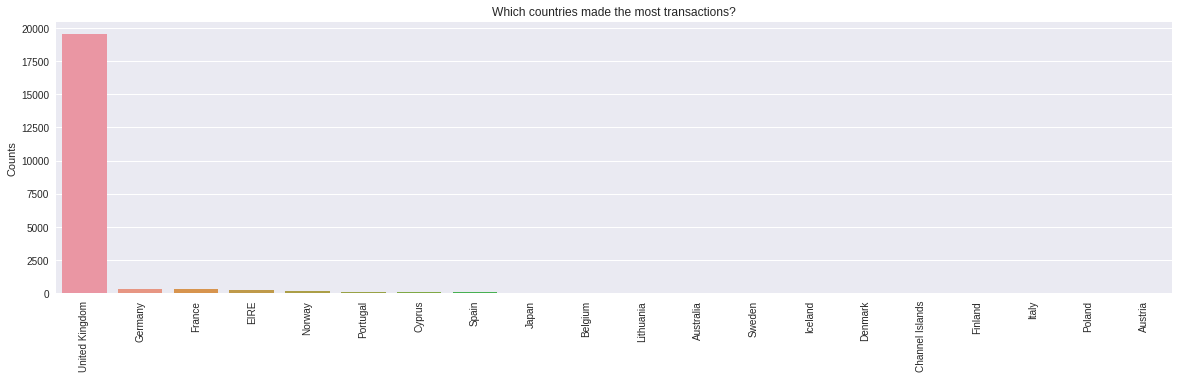

In [48]:
country_counts = data.Country.value_counts().sort_values(ascending=False).iloc[0:20]
plt.figure(figsize=(20,5))
sns.barplot(country_counts.index, country_counts.values)
plt.ylabel("Counts")
plt.title("Which countries made the most transactions?");
plt.xticks(rotation=90);

In [49]:
data.loc[data.Country=="United Kingdom"].shape[0] / data.shape[0] * 100

92.40938166311301

In [50]:
data["UK"] = np.where(data.Country == "United Kingdom", 1, 0)
data.UnitPrice.describe()
data.loc[data.UnitPrice == 0].sort_values(by="Quantity", ascending=False).head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,lowercase_descriptions,StockCodeLength,DescriptionLength,LowCharsInDescription,UpCharsInDescription,UK
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,advent calendar gingham sack,5,28,0,25,1
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647,Germany,round cake tin vintage green,5,28,0,24,0


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


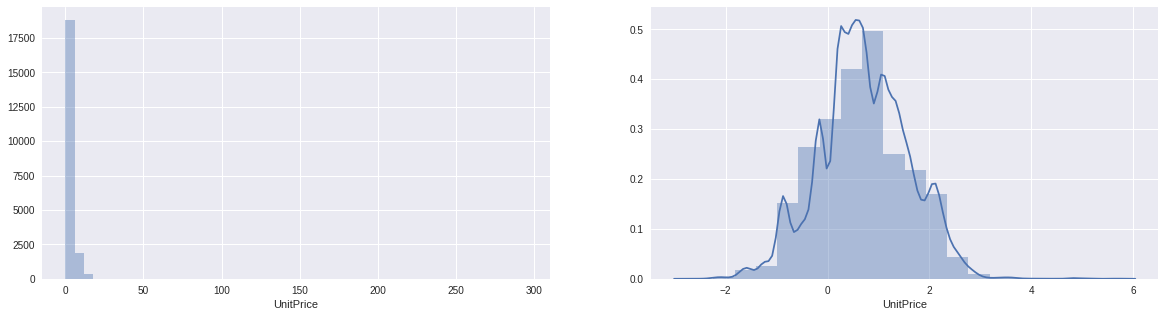

In [51]:
data = data.loc[data.UnitPrice > 0].copy()
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.distplot(data.UnitPrice, ax=ax[0], kde=False)
sns.distplot(np.log(data.UnitPrice), ax=ax[1], bins=20)

In [0]:
data = data.loc[(data.UnitPrice > 0.1) & (data.UnitPrice < 20)].copy()
data["Revenue"] = data.Quantity * data.UnitPrice

data["Year"] = data.InvoiceDate.dt.year
data["Quarter"] = data.InvoiceDate.dt.quarter
data["Month"] = data.InvoiceDate.dt.month
data["Week"] = data.InvoiceDate.dt.week
data["Weekday"] = data.InvoiceDate.dt.weekday
data["Day"] = data.InvoiceDate.dt.day
data["Dayofyear"] = data.InvoiceDate.dt.dayofyear
data["Date"] = pd.to_datetime(data[['Year', 'Month', 'Day']])
grouped_features = ["Date", "Year", "Quarter","Month", "Week", "Weekday", "Dayofyear", "Day",
                    "StockCode"]

In [55]:
daily_data = data
daily_data.loc[:, ["Quantity", "Revenue"]].describe()

,Quantity,Revenue
count,21048.000000,21048.000000
mean,11.822263,21.354029
std,46.574114,79.910397
min,1.000000,0.140000
25%,2.000000,3.900000
50%,4.000000,10.200000
75%,12.000000,19.500000
max,2880.000000,3828.000000


In [56]:
low_quantity = daily_data.Quantity.quantile(0.05)
high_quantity = daily_data.Quantity.quantile(0.90)
print((low_quantity, high_quantity))
low_revenue = daily_data.Revenue.quantile(0.05)
high_revenue = daily_data.Revenue.quantile(0.95)
print((low_revenue, high_revenue))

(1.0, 24.0)
(1.25, 66.6)


In [57]:
samples = daily_data.shape[0]
daily_data = daily_data.loc[
    (daily_data.Quantity >= low_quantity) & (daily_data.Quantity <= high_quantity)]
daily_data = daily_data.loc[
    (daily_data.Revenue >= low_revenue) & (daily_data.Revenue <= high_revenue)]
samples - daily_data.shape[0]

2605

In [58]:
week = daily_data.Week.max() - 2
print("Validation after week {}".format(week))
print("Validation starts at timepoint {}".format(
    daily_data[daily_data.Week==week].Date.min()
))

Validation after week 48
Validation starts at timepoint 2010-12-01 00:00:00


ValueError: ignored

In [66]:
!pip install catboost


    100% |████████████████████████████████| 60.0MB 554kB/s 


In [80]:
from scipy import stats
import catboost
import math
X = daily_data.drop(["Quantity", "Revenue", "Date"], axis=1)
print(stats.boxcox(daily_data.Quantity)[0])
y = daily_data.Quantity
params = CatHyperparameter()

model = Catmodel("baseline", params)
model.set_data(X,y, week)
model.learn(plot=True)

ValueError: ignored

In [81]:
products = pd.DataFrame(index=data.loc[data.Week < week].StockCode.unique(), columns = ["MedianPrice"])

products["MedianPrice"] = data.loc[data.Week < week].groupby("StockCode").UnitPrice.median()
products["MedianQuantities"] = data.loc[data.Week < week].groupby("StockCode").Quantity.median()
products["Customers"] = data.loc[data.Week < week].groupby("StockCode").CustomerID.nunique()
products["DescriptionLength"] = data.loc[data.Week < week].groupby("StockCode").DescriptionLength.median()
products["StockCode"] = products.index.values

products.head()

org_cols = np.copy(products.columns.values)
org_cols

array(['MedianPrice', 'MedianQuantities', 'Customers',
       'DescriptionLength', 'StockCode'], dtype=object)

In [0]:
#sns.distplot(products.StockCode, kde=False)

In [0]:
m = len(products.columns.values)

fig, ax = plt.subplots(m-1,1,figsize=(10,4*m))
n=0
for col in org_cols:
    if col != "StockCode":
        sns.distplot(stats.boxcox(products.loc[:, col])[0], kde=False, ax=ax[n])
        n+=1

In [0]:
from sklearn.preprocessing import StandardScaler
for col in org_cols:
    if col != "StockCode":
        products[col] = stats.boxcox(products[col])[0]

X = products.values
scaler = StandardScaler()
X = scaler.fit_transform(X)